In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
%matplotlib inline

In [2]:
#read the data
data = pd.read_csv('ionosphere.csv')
print(data.head())
X = data.drop('target',axis=1)
Y = data.target


   x_1  x_2      x_3      x_4      x_5      x_6      x_7      x_8      x_9  \
0    1    0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1    1    0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2    1    0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3    1    0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4    1    0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

      x_10   ...       x_26     x_27     x_28     x_29     x_30     x_31  \
0  0.03760   ...   -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549   ...   -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198   ...   -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000   ...    0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399   ...   -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

      x_32     x_33     x_34  target  
0 -0.54487  0.18641 -0.45300       

#### Some information on the dataset
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the [paper](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf) for more details. 

The targets were free electrons in the ionosphere."Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In order to check the effect of regularization on test data, split the data into train and test using sklearn.

In [3]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.25, random_state=42)

Create a model using Logistic Regression from sklearn. 

    1. Perform a ridge regression using sklearn. Test for the accuracy on the test dataset

In [4]:
clf_ridge = LogisticRegression(penalty='l2')
clf_ridge = clf_ridge.fit(XTrain,YTrain)
YPredict_ridge = clf_ridge.predict(XTest)
accuracy_score(YTest,YPredict_ridge)

0.8636363636363636

    2. Perform lasso regression using sklearn. Test for the accuracy on the test dataset

In [5]:
clf_lasso = LogisticRegression(penalty='l1')
clf_lasso = clf_lasso.fit(XTrain,YTrain)
YPred_lasso = clf_lasso.predict(XTest)
accuracy_score(YTest,YPred_lasso)

0.8636363636363636

    3. Tune the parameters of C(1/lambda) and appropriate choice of regularization. Default values of C and regularization is 1.0 and 'l2' - ridge respectively. Record the results (accuracy, coefficients and lambdas) in a dataframe.

In [6]:
def ridge(c,xtrain,ytrain,xtest,ytest):
    clf_ridge = LogisticRegression(penalty='l2',C=c)
    clf_ridge = clf_ridge.fit(xtrain,ytrain)
    YPredict_ridge = clf_ridge.predict(xtest)
    b = clf_ridge.coef_
    a = accuracy_score(ytest,YPredict_ridge)
    return a,b,1/c

In [7]:
a,b,l = ridge(1e9,XTrain,YTrain,XTest,YTest)

In [8]:
dictionary_ridge = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge['x'+str(i)]=b[0][i]

In [9]:
dictionary_ridge

{'accuracy': 0.8636363636363636,
 'coefficients': [array([[ 45.16098096,   0.        ,   4.21893295,   2.60069635,
            1.1120045 ,   7.75290434,   4.09892501,   7.0666158 ,
            5.844288  ,  -1.57703918,  -4.67137401,  -4.15133624,
            3.51409071,  -1.37420167,   3.8509877 ,  -8.8557517 ,
            0.71303381,   2.00941722, -12.12799221,   2.29080028,
           -3.24911208,  -3.83447365,   0.54295509,   1.6503925 ,
            6.9214056 ,  -1.58307203, -10.12771538,   1.91845911,
            5.25944875,   8.88430776,   7.94401807,   0.54862225,
           -2.07627139,  -5.84148047]])],
 'lambdas': 1e-09,
 'x0': 45.160980956052356,
 'x1': 0.0,
 'x10': -4.671374012337648,
 'x11': -4.15133624187742,
 'x12': 3.5140907116243936,
 'x13': -1.3742016694671495,
 'x14': 3.850987703915305,
 'x15': -8.855751698202422,
 'x16': 0.7130338096268147,
 'x17': 2.0094172243572976,
 'x18': -12.12799221296973,
 'x19': 2.2908002806574537,
 'x2': 4.218932946816421,
 'x20': -3.2491120

In [10]:
listofdicts = []
a,b,l = ridge(1e6,XTrain,YTrain,XTest,YTest)
dictionary_ridge_1 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_1['x'+str(i)]=b[0][i]

listofdicts.append(dictionary_ridge)
listofdicts.append(dictionary_ridge_1)
a,b,l = ridge(1e3,XTrain,YTrain,XTest,YTest)
dictionary_ridge_2 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_2['x'+str(i)]=b[0][i]
listofdicts.append(dictionary_ridge_2)

In [11]:
a,b,l = ridge(1,XTrain,YTrain,XTest,YTest)
dictionary_ridge_3 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_3['x'+str(i)]=b[0][i]
listofdicts.append(dictionary_ridge_3)

a,b,l = ridge(1e-3,XTrain,YTrain,XTest,YTest)
dictionary_ridge_4 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_4['x'+str(i)]=b[0][i]
listofdicts.append(dictionary_ridge_4)

a,b,l = ridge(1e-6,XTrain,YTrain,XTest,YTest)
dictionary_ridge_5 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_5['x'+str(i)]=b[0][i]
listofdicts.append(dictionary_ridge_5)

a,b,l = ridge(1e-9,XTrain,YTrain,XTest,YTest)
dictionary_ridge_6 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_6['x'+str(i)]=b[0][i]
listofdicts.append(dictionary_ridge_6)

In [12]:
listofdicts

[{'accuracy': 0.8636363636363636,
  'coefficients': [array([[ 45.16098096,   0.        ,   4.21893295,   2.60069635,
             1.1120045 ,   7.75290434,   4.09892501,   7.0666158 ,
             5.844288  ,  -1.57703918,  -4.67137401,  -4.15133624,
             3.51409071,  -1.37420167,   3.8509877 ,  -8.8557517 ,
             0.71303381,   2.00941722, -12.12799221,   2.29080028,
            -3.24911208,  -3.83447365,   0.54295509,   1.6503925 ,
             6.9214056 ,  -1.58307203, -10.12771538,   1.91845911,
             5.25944875,   8.88430776,   7.94401807,   0.54862225,
            -2.07627139,  -5.84148047]])],
  'lambdas': 1e-09,
  'x0': 45.160980956052356,
  'x1': 0.0,
  'x10': -4.671374012337648,
  'x11': -4.15133624187742,
  'x12': 3.5140907116243936,
  'x13': -1.3742016694671495,
  'x14': 3.850987703915305,
  'x15': -8.855751698202422,
  'x16': 0.7130338096268147,
  'x17': 2.0094172243572976,
  'x18': -12.12799221296973,
  'x19': 2.2908002806574537,
  'x2': 4.21893294681

In [13]:
ridge = pd.DataFrame(listofdicts)
ridge.drop('coefficients',axis=1)

,accuracy,lambdas,x0,x1,x10,x11,x12,x13,x14,x15,...,x30,x31,x32,x33,x4,x5,x6,x7,x8,x9
0,0.863636,1.000000e-09,4.516098e+01,0.0,-4.671374e+00,-4.151336e+00,3.514091e+00,-1.374202e+00,3.850988e+00,-8.855752e+00,...,7.944018e+00,5.486223e-01,-2.076271e+00,-5.841480e+00,1.112005e+00,7.752904e+00,4.098925e+00,7.066616e+00,5.844288e+00,-1.577039e+00
1,0.863636,1.000000e-06,4.502576e+01,0.0,-4.669236e+00,-4.149678e+00,3.512098e+00,-1.373869e+00,3.849773e+00,-8.853530e+00,...,7.941170e+00,5.490925e-01,-2.076154e+00,-5.840516e+00,1.110894e+00,7.751398e+00,4.097780e+00,7.065861e+00,5.843610e+00,-1.576799e+00
2,0.863636,1.000000e-03,3.110358e+01,0.0,-3.662810e+00,-3.331983e+00,2.507944e+00,-1.039273e+00,3.111897e+00,-7.400261e+00,...,6.568686e+00,4.990324e-01,-2.060494e+00,-5.134359e+00,7.133070e-01,6.913790e+00,3.649126e+00,6.421378e+00,5.188902e+00,-1.673590e+00
3,0.863636,1.000000e+00,1.111331e+00,0.0,-4.743553e-01,-1.489711e-01,-3.044321e-01,6.550696e-01,7.298264e-01,-1.062992e-01,...,6.713724e-01,8.469579e-02,-2.171798e-01,-8.718875e-01,1.166575e+00,8.692110e-01,7.471944e-01,1.190288e+00,1.147020e+00,-3.844123e-01
4,0.647727,1.000000e+03,3.727827e-02,0.0,1.901810e-02,1.242759e-02,1.965973e-02,1.429892e-02,2.236261e-02,1.055773e-02,...,2.578991e-02,-3.067010e-03,2.071124e-02,-3.897242e-03,4.209330e-02,1.025756e-02,3.722059e-02,1.737683e-02,2.858822e-02,9.560402e-03
5,0.647727,1.000000e+06,5.197871e-05,0.0,2.981423e-05,1.405679e-05,2.996340e-05,1.558593e-05,3.211430e-05,1.140269e-05,...,3.467039e-05,-3.018014e-06,2.964259e-05,-4.052542e-06,5.480414e-05,1.181069e-05,4.906457e-05,1.803890e-05,3.971839e-05,1.146219e-05
6,0.647727,1.000000e+09,5.199998e-08,0.0,2.983021e-08,1.405882e-08,2.997865e-08,1.558745e-08,3.212879e-08,1.140366e-08,...,3.468342e-08,-3.017859e-09,2.965571e-08,-4.052768e-09,5.482251e-08,1.181276e-08,4.908173e-08,1.803948e-08,3.973471e-08,1.146466e-08


In [14]:
def lasso(c,xtrain,ytrain,xtest,ytest):
    clf_l = LogisticRegression(penalty='l1',C=c)
    clf_l = clf_l.fit(xtrain,ytrain)
    YPredict_l = clf_l.predict(xtest)
    b = clf_l.coef_
    a = accuracy_score(ytest,YPredict_l)
    return a,b,1/c

In [15]:
list_lasso = []

a,b,l = lasso(1e9,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_1 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_1['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_1)

a,b,l = lasso(1e6,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_2 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_2['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_2)


a,b,l = lasso(1e3,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_3 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_3['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_3)

a,b,l = lasso(1,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_4 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_4['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_4)

a,b,l = lasso(1e-3,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_5 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_5['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_5)

a,b,l = lasso(1e-6,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_6 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_6['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_6)

a,b,l = lasso(1e-9,XTrain,YTrain,XTest,YTest)
dictionary_ridge_Lasso_7 = {'accuracy':a,'coefficients':[b],'lambdas':l}
for i in range(0,34):
    dictionary_ridge_Lasso_7['x'+str(i)]=b[0][i]
list_lasso.append(dictionary_ridge_Lasso_7)

list_lasso

[{'accuracy': 0.8636363636363636,
  'coefficients': [array([[ 40.04304783,   0.        ,   4.12792937,   2.61107678,
             1.02809267,   7.6336617 ,   3.97567998,   7.01137112,
             5.77833255,  -1.56438499,  -4.48962876,  -4.00359668,
             3.34082752,  -1.33587121,   3.74641366,  -8.65724091,
             0.74702361,   2.00008317, -11.66625061,   2.14930297,
            -3.04878524,  -3.78999115,   0.56234831,   1.60544029,
             6.69496384,  -1.41364411,  -9.96691459,   1.73774742,
             5.13272373,   8.64747164,   7.68054665,   0.58469579,
            -2.03968521,  -5.76854691]])],
  'lambdas': 1e-09,
  'x0': 40.04304783343079,
  'x1': 0.0,
  'x10': -4.48962876460843,
  'x11': -4.003596680498695,
  'x12': 3.340827523590686,
  'x13': -1.3358712078474968,
  'x14': 3.7464136628886413,
  'x15': -8.657240907240217,
  'x16': 0.747023614827028,
  'x17': 2.0000831655833182,
  'x18': -11.666250612021388,
  'x19': 2.149302970770103,
  'x2': 4.1279293658474

In [16]:
lasso_df =pd.DataFrame(list_lasso)
lasso_df.drop('coefficients',axis=1)

,accuracy,lambdas,x0,x1,x10,x11,x12,x13,x14,x15,...,x30,x31,x32,x33,x4,x5,x6,x7,x8,x9
0,0.863636,1.000000e-09,40.043048,0.0,-4.489629,-4.003597,3.340828,-1.335871,3.746414,-8.657241,...,7.680547,0.584696,-2.039685,-5.768547,1.028093,7.633662,3.975680,7.011371,5.778333,-1.564385
1,0.863636,1.000000e-06,39.953737,0.0,-4.484053,-3.998507,3.335048,-1.334564,3.742978,-8.650410,...,7.671265,0.585073,-2.039739,-5.765719,1.027460,7.629456,3.971227,7.009450,5.773880,-1.564322
2,0.863636,1.000000e-03,39.894638,0.0,-4.456502,-3.973487,3.322093,-1.326794,3.706183,-8.593455,...,7.634473,0.573349,-2.043076,-5.735941,1.013862,7.592357,3.968095,6.975415,5.729273,-1.559344
3,0.863636,1.000000e+00,2.401620,0.0,-0.080303,0.000000,0.000000,0.414087,0.500131,-0.021372,...,0.522145,0.000000,0.000000,-0.822670,1.192088,0.960384,0.833491,1.230266,0.991975,0.000000
4,0.363636,1.000000e+03,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.363636,1.000000e+06,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.363636,1.000000e+09,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
ridge

,accuracy,coefficients,lambdas,x0,x1,x10,x11,x12,x13,x14,...,x30,x31,x32,x33,x4,x5,x6,x7,x8,x9
0,0.863636,"[[[45.160980956052356, 0.0, 4.218932946816421,...",1.000000e-09,4.516098e+01,0.0,-4.671374e+00,-4.151336e+00,3.514091e+00,-1.374202e+00,3.850988e+00,...,7.944018e+00,5.486223e-01,-2.076271e+00,-5.841480e+00,1.112005e+00,7.752904e+00,4.098925e+00,7.066616e+00,5.844288e+00,-1.577039e+00
1,0.863636,"[[[45.02576074081582, 0.0, 4.217792097962844, ...",1.000000e-06,4.502576e+01,0.0,-4.669236e+00,-4.149678e+00,3.512098e+00,-1.373869e+00,3.849773e+00,...,7.941170e+00,5.490925e-01,-2.076154e+00,-5.840516e+00,1.110894e+00,7.751398e+00,4.097780e+00,7.065861e+00,5.843610e+00,-1.576799e+00
2,0.863636,"[[[31.103577285563034, 0.0, 3.862145212220704,...",1.000000e-03,3.110358e+01,0.0,-3.662810e+00,-3.331983e+00,2.507944e+00,-1.039273e+00,3.111897e+00,...,6.568686e+00,4.990324e-01,-2.060494e+00,-5.134359e+00,7.133070e-01,6.913790e+00,3.649126e+00,6.421378e+00,5.188902e+00,-1.673590e+00
3,0.863636,"[[[1.111330609323647, 0.0, 1.3999270666689867,...",1.000000e+00,1.111331e+00,0.0,-4.743553e-01,-1.489711e-01,-3.044321e-01,6.550696e-01,7.298264e-01,...,6.713724e-01,8.469579e-02,-2.171798e-01,-8.718875e-01,1.166575e+00,8.692110e-01,7.471944e-01,1.190288e+00,1.147020e+00,-3.844123e-01
4,0.647727,"[[[0.037278274277012684, 0.0, 0.04412953102409...",1.000000e+03,3.727827e-02,0.0,1.901810e-02,1.242759e-02,1.965973e-02,1.429892e-02,2.236261e-02,...,2.578991e-02,-3.067010e-03,2.071124e-02,-3.897242e-03,4.209330e-02,1.025756e-02,3.722059e-02,1.737683e-02,2.858822e-02,9.560402e-03
5,0.647727,"[[[5.197871314104402e-05, 0.0, 5.6804596830975...",1.000000e+06,5.197871e-05,0.0,2.981423e-05,1.405679e-05,2.996340e-05,1.558593e-05,3.211430e-05,...,3.467039e-05,-3.018014e-06,2.964259e-05,-4.052542e-06,5.480414e-05,1.181069e-05,4.906457e-05,1.803890e-05,3.971839e-05,1.146219e-05
6,0.647727,"[[[5.199997889884618e-08, 0.0, 5.6822851941764...",1.000000e+09,5.199998e-08,0.0,2.983021e-08,1.405882e-08,2.997865e-08,1.558745e-08,3.212879e-08,...,3.468342e-08,-3.017859e-09,2.965571e-08,-4.052768e-09,5.482251e-08,1.181276e-08,4.908173e-08,1.803948e-08,3.973471e-08,1.146466e-08


    4. Plot the coefficients against lambdas and accuracy against lambdas for both lasso and ridge regularization.

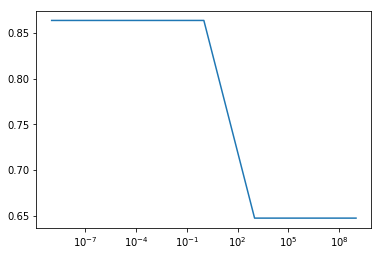

In [18]:
plt.plot(ridge.lambdas,ridge.accuracy)
plt.xscale("log")

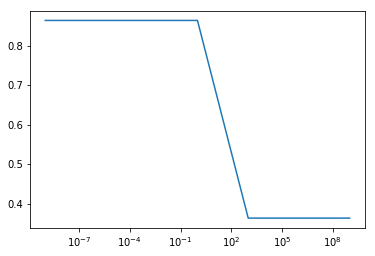

In [19]:
plt.plot(lasso_df.lambdas,lasso_df.accuracy)
plt.xscale("log")

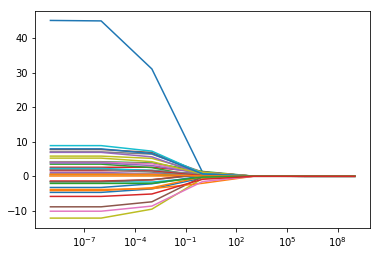

In [24]:
for i in range(0,34):
    plt.plot(ridge.lambdas,ridge['x'+str(i)])
plt.xscale('log')

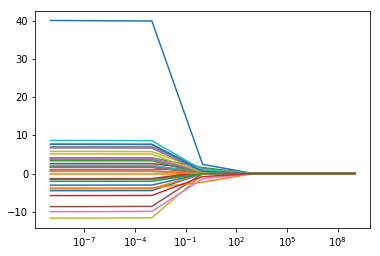

In [25]:
for i in range(0,34):
    plt.plot(lasso_df.lambdas,lasso_df['x'+str(i)])
plt.xscale('log')